In [1]:
from numpy import genfromtxt, mean, linalg, allclose, diag, matrix, array, cos, sin, pi, sqrt
from numpy.random import normal, random, uniform
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import cKDTree
from scipy.stats import special_ortho_group

In [2]:
data = array([[0, 0], [0, 1], [1, 0]])

In [3]:
b = array([sqrt(2) / 2, sqrt(2) / 2])

In [4]:
def rotation_x():
    theta = pi
    print theta
    return matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

In [5]:
R = rotation_x()

3.14159265359


In [6]:
source = array((R.dot(data.T)).T  + b.T)

In [7]:
def visualize(source, result):
    x_source = [source[0, 0], source[1, 0], source[2, 0], source[0, 0]]
    y_source = [source[0, 1], source[1, 1], source[2, 1], source[0, 1]]
    x_result = [result[0, 0], result[1, 0], result[2, 0], result[0, 0]]
    y_result = [result[0, 1], result[1, 1], result[2, 1], result[0, 1]]
    pyplot.plot(x_source, y_source, c='b', marker='o')
    pyplot.plot(x_result, y_result, c='r', marker='^')
    pyplot.show()

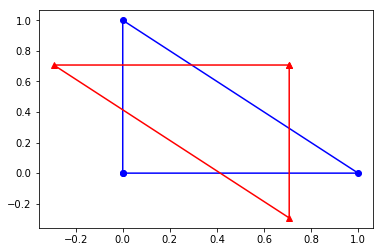

In [8]:
visualize(data, source)

In [9]:
tree = cKDTree(data)

def find_labeling(target, source):
    return target[tree.query(source)[1]]

In [10]:
def find_transformation(nearest_neighbours, source):
    centroid_target = mean(nearest_neighbours, axis=0)
    centroid_source = mean(source, axis=0)
    H = ((source - centroid_source).T).dot(nearest_neighbours - centroid_target)
    U, S, V = linalg.svd(H)
    R = ((V.T).dot(diag([1, linalg.det((V.T).dot(U.T))]))).dot(U.T)
    t = centroid_target - R.dot(centroid_source.T).T
    print "R: ", R.T
    print "t: ", t
    return R.dot(source.T).T + t

In [11]:
def icp(target, source, max_iterations=1000):
    labelings = []
    transformations = []
    labelings.append(find_labeling(target, source))
    transformations.append(find_transformation(labelings[0], source))
    i = 1
    print i
    visualize(data, transformations[-1])
    while (len(labelings) < 2 or not allclose(labelings[-1], labelings[-2])) and i < max_iterations:
        i += 1
        print i
        labelings.append(find_labeling(target, transformations[-1]))
        transformations.append(find_transformation(labelings[-1], source))
        visualize(data, transformations[-1])
    print 'Number of iterations:', i
    return transformations

R:  [[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]]
t:  [ 0.09693825  0.1938765 ]
1


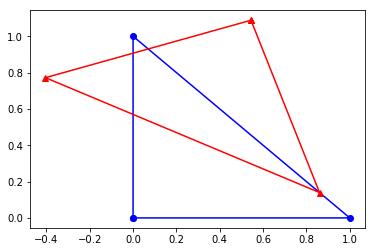

2
R:  [[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]]
t:  [ 0.09693825  0.1938765 ]


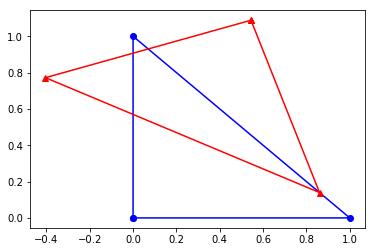

Number of iterations: 2
CPU times: user 612 ms, sys: 20 ms, total: 632 ms
Wall time: 644 ms


In [12]:
%%time
result = icp(data, source)[-1]